# BUSINESS UNDERSTANDING:
During this project, I assumed the role of a data scientist whereby I used our dataset("kc_house_data.csv") to generate 
various business problems that will be the founding blocks of our linear regression models.
# STAKEHOLDER
I assumed the role of a data scientist at Vision Real Estate Agency where I'm tasked at coming up with models that can predict house prices based on ceratin features in our dataset.
# Business problems:
### Model 1 :
Provide insight to Vision Real Estate Agency on how the footage of a home and  can cause changes in house prices and by how much.
### Model 2 :
Provide insight to Vision Real Estate Agency on how the footage of a home and the footage of the nearest 15 neighbours can cause changes in house prices and by how much.
### Model 3 : 
Provide insight to Vision Real Estate Agency on how the footage of a home, the footage of the nearest 15 neighbours,  footage of the lot,  footage of the nearest 15 neighbours, number of floors, number of bathrooms,footage of basement and footage of above  can cause changes in house prices and by how much.
### Model 4 : 
Provide insight to Vision Real Estate Agency on how the footage of a home and condition of the home can cause changes in house prices and by how much.

# DATA UNDERSTANDING.
Our dataset("kc_house_data.csv") contains Kings County housing data. The data set consists of 21 columns and 21612 rows.
The columns are: ![1_tfBY7bRc6ttOaBmUX4RVyg](https://user-images.githubusercontent.com/110511316/192426070-98622317-8209-4533-b909-d2978a2ec870.png)

In [1]:
# importing the necessary liblaries.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Viewing the data from our source.
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# Viewing the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# DATA CLEANING.
This was done to ensure the Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.
​
TASK1 :The first task was to check if the column names were uniform and readable.
​
TASK2 :The second task was to check for duplcated rows.
​
TASK3 :The next task was to check if there were missing values.
​
TASK4 :The next task was to decide how to deal with the missing values.
       (Either drop if they are unnecesary or replace the missing values with the best fit.)
       
TASK5 :The last task was to check if the columns had the correct data type.

In [5]:
df.head()
#TASK1: All column names are uniform and readable.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.duplicated().value_counts()
#TASK2: THERE WERE NO DUPLICATE VALUES.

False    21613
dtype: int64

In [7]:
df.isna().sum()
#TASK3: There were 2 missing values in sqft_above

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.dropna(subset=['sqft_above'], inplace= True)
#TASK4: decided to drop the rows with missing values since they are only 2 and cannot cause a significant 
#change to our data.
df.isna().sum()
# Confirm no more missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.info()
#TASK5: The last task was to check if the columns had the correct data type
#Zipcode hadthe wrong data type 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

In [10]:
df['zipcode'] = df['zipcode'].astype('str')
#Changed zipcode datatype to string.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  object 
 17  lat            21611 non-null  float64
 18  long  

### REMOVING OUTLIERS

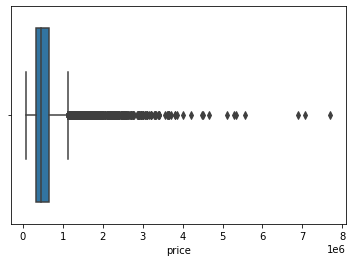

In [11]:
sns.boxplot(df['price']);

In [12]:
Q1 = np.percentile(df['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['price'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (21611, 21)
New Shape:  (20465, 21)


In [13]:
df['log_price'] = np.log(df['price'])

Text(0.5, 1.0, 'Distribution of log-transformed price with KDE plot')

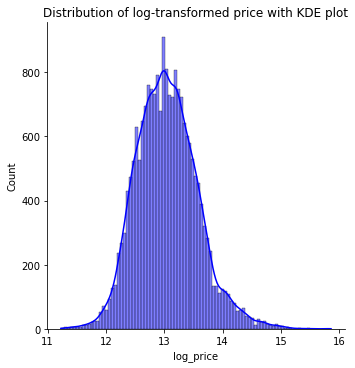

In [14]:
# Transform the target variable "price" to "log_price" via logarithmic notations in numpy liblaires inorder
# to reduce the occurence of multicollinearity and homoscedacity.
sns.displot(df['log_price'], kde=True, color='blue')
plt.title('Distribution of log-transformed price with KDE plot')

In [15]:
#Test if our column's data is normal.
from scipy.stats import shapiro
shapiro(df['log_price'])

ShapiroResult(statistic=0.9894188046455383, pvalue=7.051003838668162e-36)

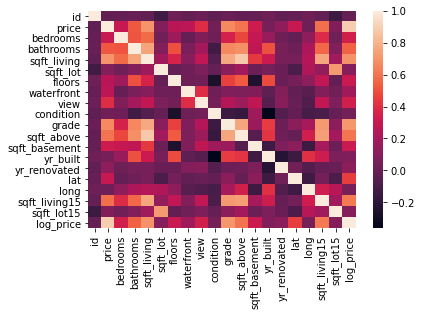

In [16]:
#Check for multi collinearity
sns.heatmap(df.corr());

In [17]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509,12.793859
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200,12.899220
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007,12.904459
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287,12.899220


# MODEL 1

### Simple linear Regression model.

In [18]:
df.corr()["log_price"] 

id              -0.004409
price            0.891996
bedrooms         0.343030
bathrooms        0.551168
sqft_living      0.696084
sqft_lot         0.098835
floors           0.313124
waterfront       0.172363
view             0.345867
condition        0.038814
grade            0.703457
sqft_above       0.602132
sqft_basement    0.316407
yr_built         0.080349
yr_renovated     0.115379
lat              0.448827
long             0.050824
sqft_living15    0.619841
sqft_lot15       0.092108
log_price        1.000000
Name: log_price, dtype: float64

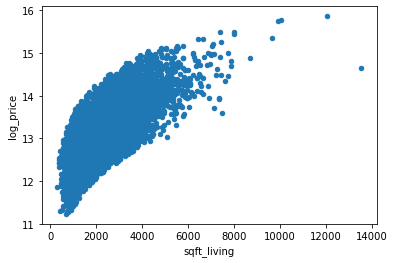

In [19]:
df.plot.scatter(x="sqft_living", y="log_price");

In [20]:
y = df["log_price"]
X_baseline = df[["sqft_living"]]

In [21]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                 1.924e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:18:25   Log-Likelihood:                -9116.1
No. Observations:               20465   AIC:                         1.824e+04
Df Residuals:                   20463   BIC:                         1.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2166      0.007   1867.791      

### Simple Linear Regression Results
​
Looking at the summary above, we can see that the regression line we found was
​
$$ \hat{log_price} = (12.2185) + 0.0004sqft_living $$
​
* The model is statistically significant overall, with an F-statistic p-value well below our alpha of 0.05.
* The model explains about 48.5% of the variance in price.
* The model coefficients (`const` and `sqft_living`) are both statistically significant, with p-values well     below 0.05 . The y-intercept is at (12.2185).
* If a house added at least 1sqft living room space, we would expect it to have about (0.0004 * 100)% increase increase in price.

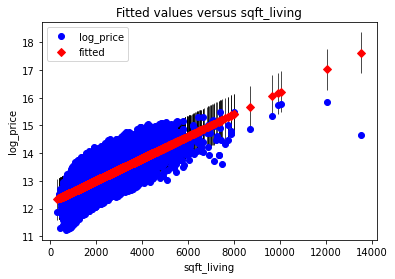

In [22]:
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

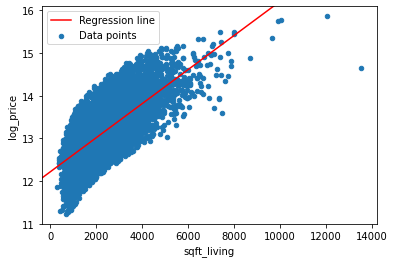

In [23]:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="log_price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="red")
ax.legend();

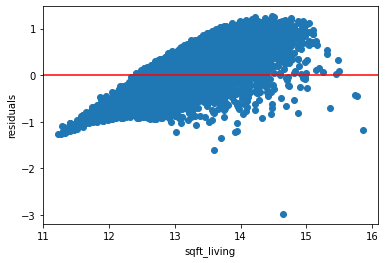

In [24]:
fig, ax = plt.subplots()

ax.scatter(df["log_price"], baseline_results.resid)
ax.axhline(y=0, color="red")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

In [25]:
baseline_results.resid.abs()
mae = baseline_results.resid.abs().sum() / len(y)
mae

0.3067795564432806

# MODEL 2
### Model with Two Features

Now let's expand from our simple linear regression to a multiple linear regression. 

The process of building this model with StatsModels is very similar to the process of building our baseline simple regression model; this time we simply create a variable containing multiple columns.

In [26]:
df.corr()["sqft_living"] 

id              -0.015392
price            0.702252
bedrooms         0.575327
bathrooms        0.754835
sqft_living      1.000000
sqft_lot         0.172181
floors           0.357206
waterfront       0.105315
view             0.287874
condition       -0.059863
grade            0.763461
sqft_above       0.876695
sqft_basement    0.432687
yr_built         0.319122
yr_renovated     0.056576
lat              0.053185
long             0.241712
sqft_living15    0.757252
sqft_lot15       0.186119
log_price        0.696084
Name: sqft_living, dtype: float64

In [27]:
two_independent_vars = df[["sqft_living15", "sqft_living"]]
two_independent_vars

,sqft_living15,sqft_living
0,1340,1180
1,1690,2570
2,2720,770
3,1360,1960
4,1800,1680
...,...,...
21608,1530,1530
21609,1830,2310
21610,1020,1020
21611,1410,1600


In [28]:
two_independent_vars_model = sm.OLS(y, sm.add_constant(two_independent_vars))
two_independent_vars_model_results = two_independent_vars_model.fit()

print(two_independent_vars_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                 1.042e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:18:30   Log-Likelihood:                -8707.9
No. Observations:               20465   AIC:                         1.742e+04
Df Residuals:                   20462   BIC:                         1.745e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0815      0.008   1521.834

In [29]:
two_independent_vars_model_results.resid.abs()
mae = two_independent_vars_model_results.resid.abs().sum() / len(y)
mae

0.3022783077169817

### Model with Two Features Results

This time, the model we built was:

$$ \hat{log_price} = ( 12.0815 ) + 0.0002sqft_living15  + 0.0003 sqft_living $$

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 50.5% of the variance in price which is an increase from our linear regression.
* The model coefficients(`const`, `sqft_living15`, and `sqft_living`)are all statistically significant, with t-statistic p-values   well below 0.05
* For each increase of 1  in sqft_living15, we see an associated increase in price of about 0.02%
* For each increase of 1 in the sqft_living, we see an associated increase in price of about 0.03%

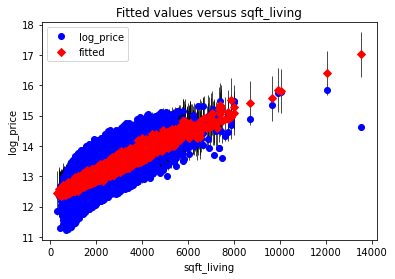

In [30]:
sm.graphics.plot_fit(two_independent_vars_model_results, "sqft_living")
plt.show()

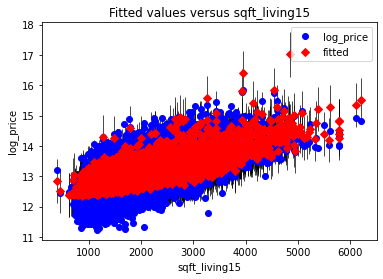

In [31]:
sm.graphics.plot_fit(two_independent_vars_model_results, "sqft_living15")
plt.show()

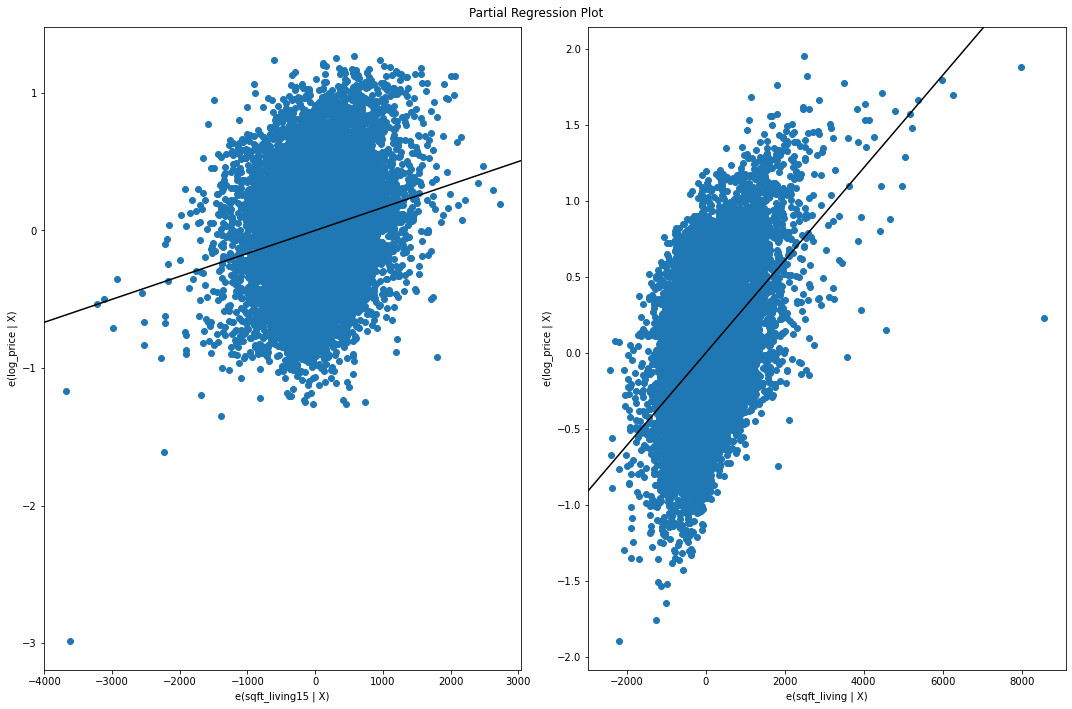

In [32]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(two_independent_vars_model_results, 
                                  exog_idx=["sqft_living15", "sqft_living"], fig=fig)
plt.tight_layout()
plt.show();

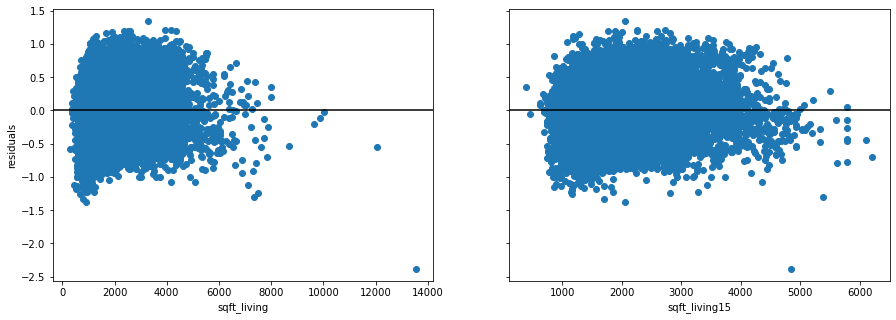

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)

weight_ax = axes[0]
weight_ax.scatter(df["sqft_living"], two_independent_vars_model_results.resid)
weight_ax.axhline(y=0, color="black")
weight_ax.set_xlabel("sqft_living")
weight_ax.set_ylabel("residuals")

year_ax = axes[1]
year_ax.scatter(df["sqft_living15"], two_independent_vars_model_results.resid)
year_ax.axhline(y=0, color="black")
year_ax.set_xlabel("sqft_living15");

# MODEL3

### Model with Multiple features
This model contains all non-categorical variables excluding yr built and yr renovated.

In [34]:
df.corr()['price']

id              -0.017376
price            1.000000
bedrooms         0.307809
bathrooms        0.525286
sqft_living      0.702252
sqft_lot         0.088567
floors           0.260546
waterfront       0.267955
view             0.398828
condition        0.034945
grade            0.667396
sqft_above       0.605619
sqft_basement    0.322673
yr_built         0.053456
yr_renovated     0.128729
lat              0.307594
long             0.022438
sqft_living15    0.586410
sqft_lot15       0.083152
log_price        0.891996
Name: price, dtype: float64

In [35]:
multiple_independent_vars = df[["sqft_lot15", "sqft_living", "sqft_lot" , "floors", "sqft_living15", 
                                 "bathrooms", "bedrooms", "sqft_above", "sqft_basement"]]
multiple_independent_vars

,sqft_lot15,sqft_living,sqft_lot,floors,sqft_living15,bathrooms,bedrooms,sqft_above,sqft_basement
0,5650,1180,5650,1.0,1340,1.00,3,1180.0,0
1,7639,2570,7242,2.0,1690,2.25,3,2170.0,400
2,8062,770,10000,1.0,2720,1.00,2,770.0,0
3,5000,1960,5000,1.0,1360,3.00,4,1050.0,910
4,7503,1680,8080,1.0,1800,2.00,3,1680.0,0
...,...,...,...,...,...,...,...,...,...
21608,1509,1530,1131,3.0,1530,2.50,3,1530.0,0
21609,7200,2310,5813,2.0,1830,2.50,4,2310.0,0
21610,2007,1020,1350,2.0,1020,0.75,2,1020.0,0
21611,1287,1600,2388,2.0,1410,2.50,3,1600.0,0


In [36]:
multiple_independent_vars_model = sm.OLS(y, sm.add_constant(multiple_independent_vars))
multiple_independent_vars_model_results = multiple_independent_vars_model.fit()

print(multiple_independent_vars_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     2805.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:18:37   Log-Likelihood:                -8320.6
No. Observations:               20465   AIC:                         1.666e+04
Df Residuals:                   20456   BIC:                         1.673e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0553      0.013    958.877

### Model with Multiple Features Results

This time, the model we built was:

$$ \hat{log_price } = ( 12.0553  ) + (-1.09e-06) sqft_lot15  +  0.0002 sqft_living + (3.129e-07 )sqft_lot +  0.1089floors + 0.0002sqft_living15 0.0165bathrooms + (-0.0454)bedrooms + (4.059e-05)sqft_above + 0.0002sqft_basement$$ 

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 51.2% of the variance in price which is an increase from our linear regression.
* The model coefficients(`const`, `sqft_living15`, `sqft_living`,`sqft_lot15`,,`floors`,`bathrooms` ,`sqft_basement`,`above` and `bedrooms` )are all statistically significant, with t-statistic p-values  below 0.05
* A change in any of the  above features causes  a (coeeficient of the feature * 100)% change to price of a house.

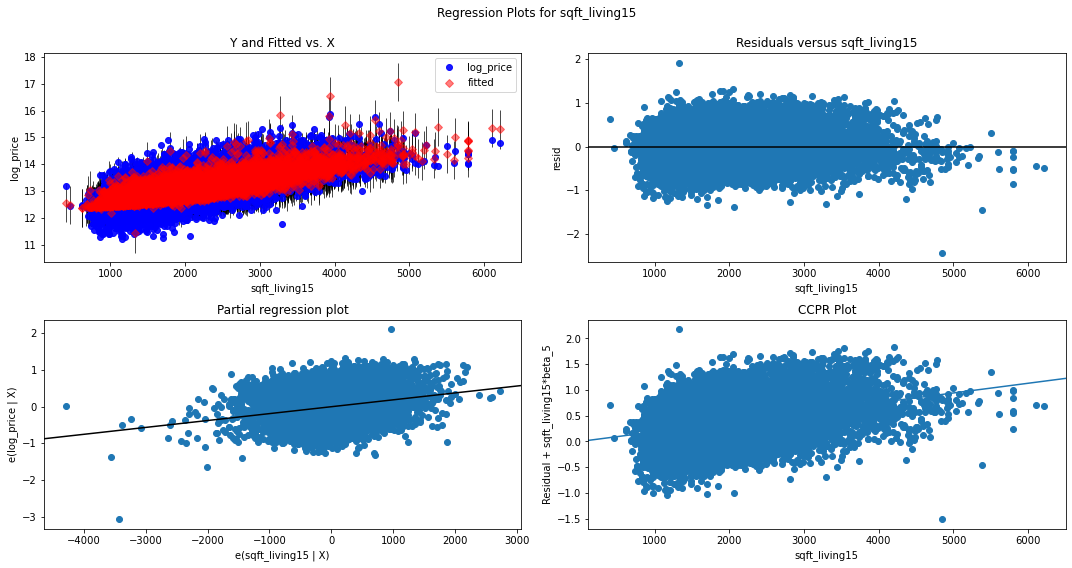

In [37]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(multiple_independent_vars_model_results, "sqft_living15", fig=fig)
plt.show()

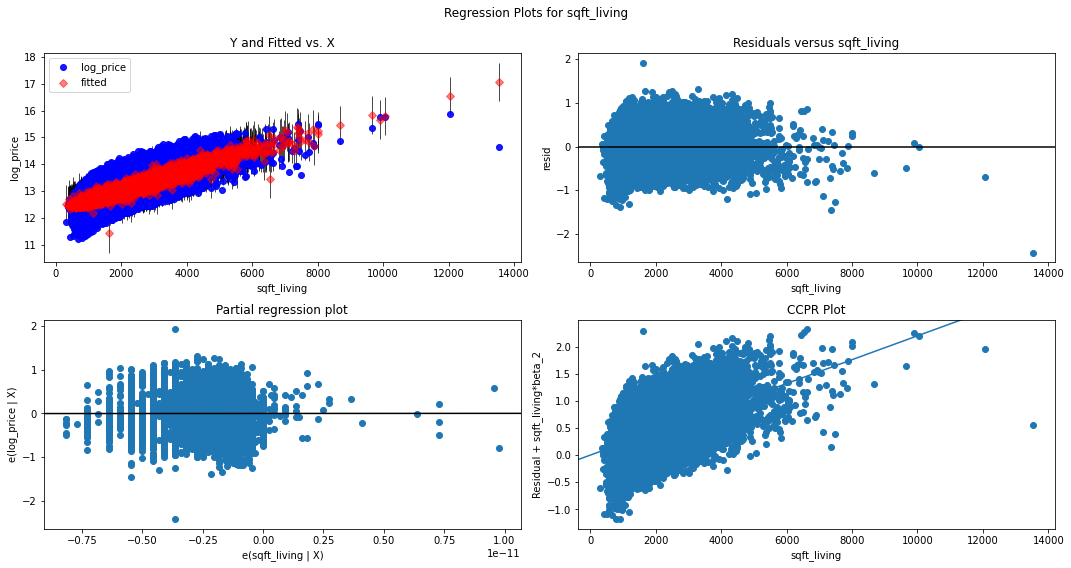

In [38]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(multiple_independent_vars_model_results, "sqft_living", fig=fig)
plt.show()

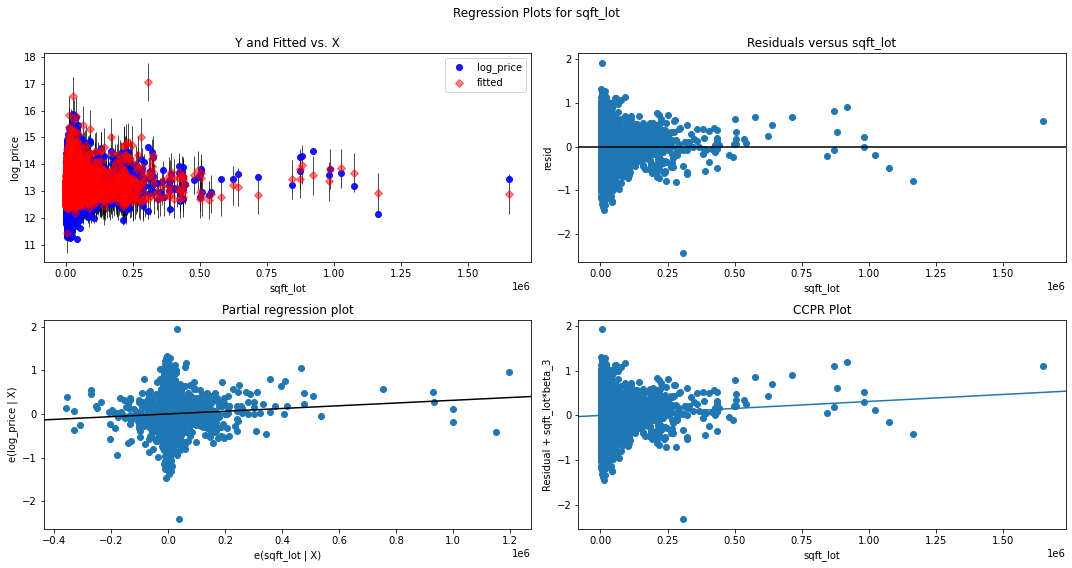

In [39]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(multiple_independent_vars_model_results, "sqft_lot", fig=fig)
plt.show()

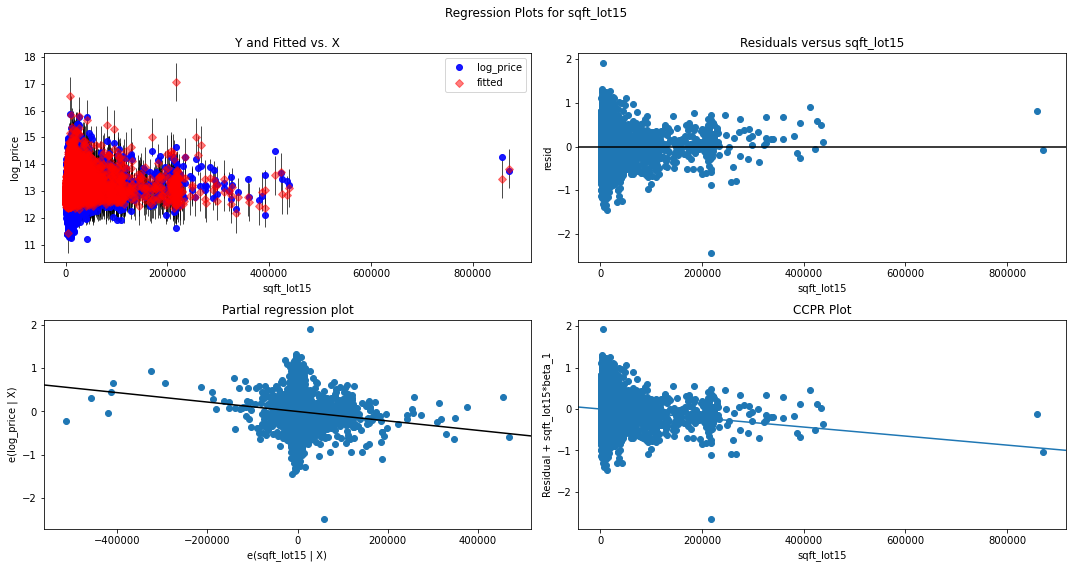

In [40]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(multiple_independent_vars_model_results, "sqft_lot15", fig=fig)
plt.show()

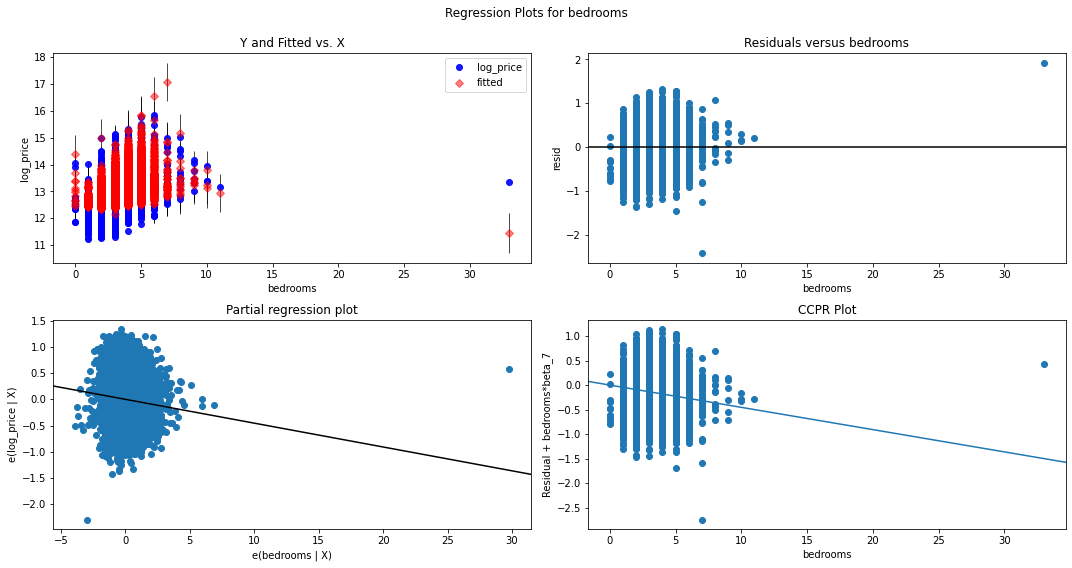

In [41]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(multiple_independent_vars_model_results, "bedrooms", fig=fig)
plt.show()

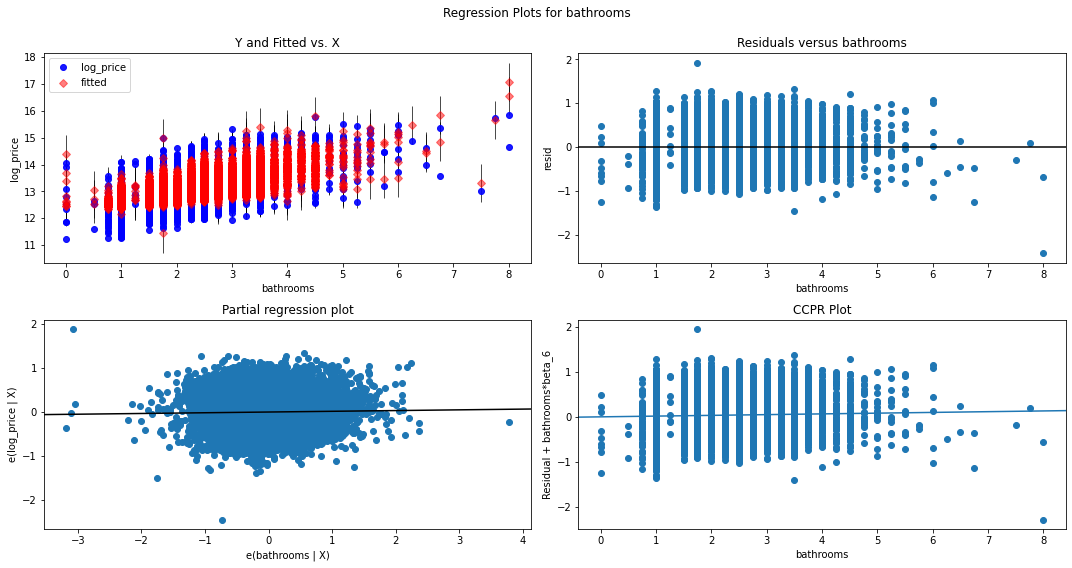

In [42]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(multiple_independent_vars_model_results, "bathrooms", fig=fig)
plt.show()

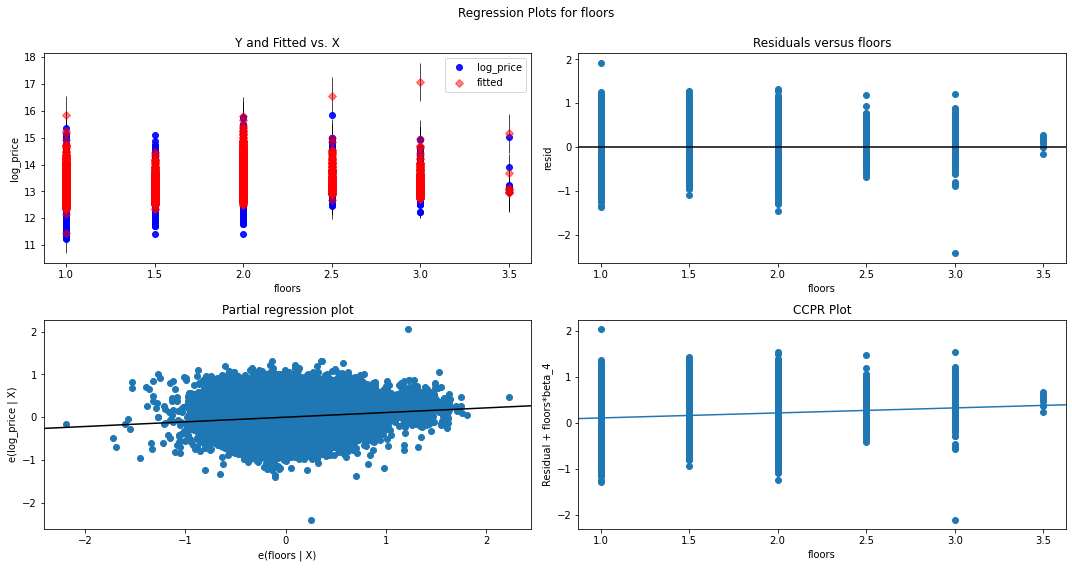

In [43]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(multiple_independent_vars_model_results, "floors", fig=fig)
plt.show()

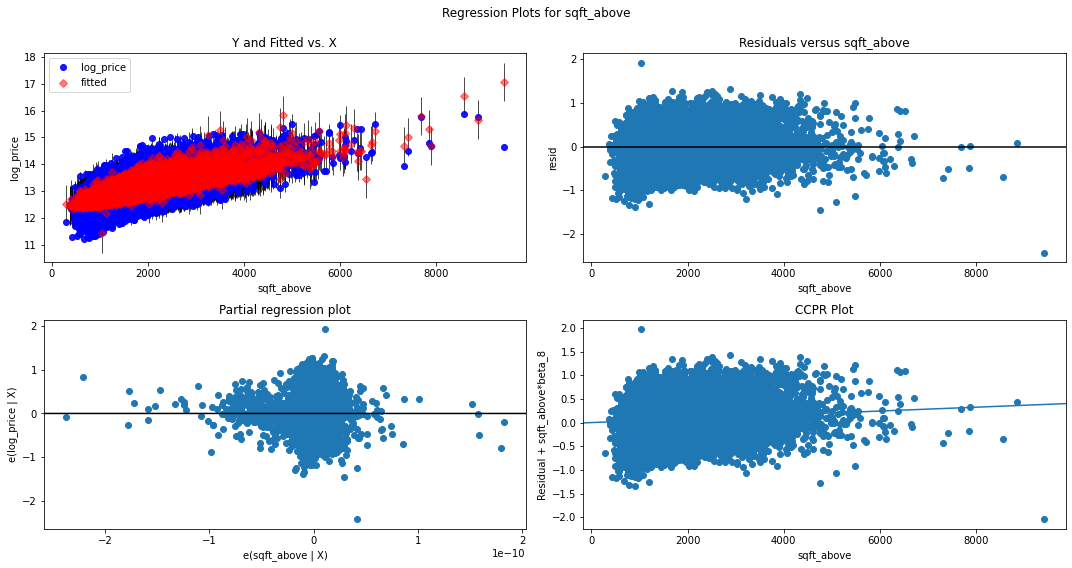

In [44]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(multiple_independent_vars_model_results, "sqft_above", fig=fig)
plt.show()

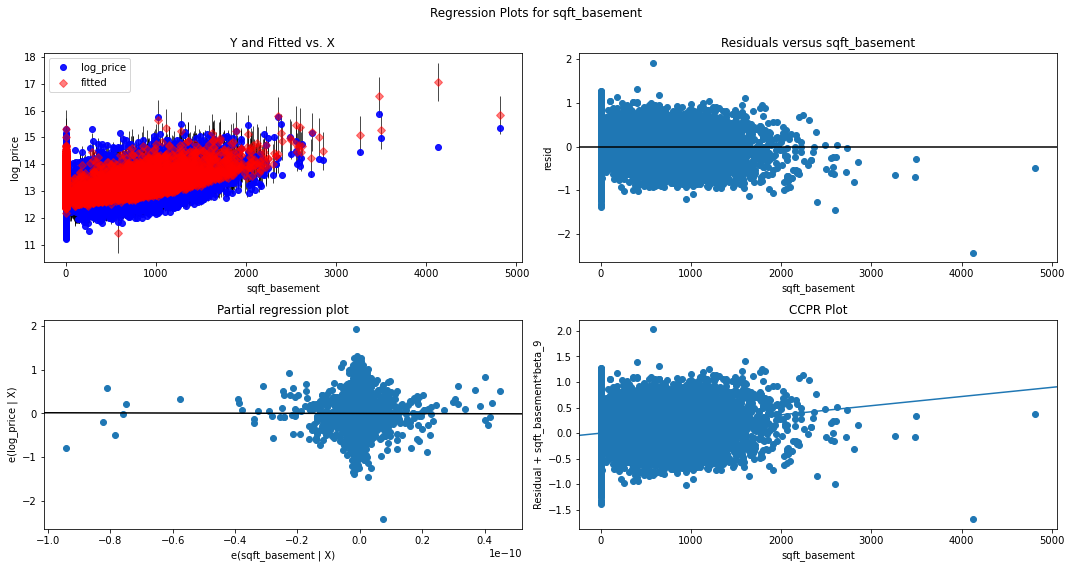

In [45]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(multiple_independent_vars_model_results, "sqft_basement", fig=fig)
plt.show()

# MODEL 4
### Multiple Regression with categorical Variables

In [46]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509,12.793859
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200,12.899220
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007,12.904459
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287,12.899220


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20465 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20465 non-null  int64  
 1   date           20465 non-null  object 
 2   price          20465 non-null  float64
 3   bedrooms       20465 non-null  int64  
 4   bathrooms      20465 non-null  float64
 5   sqft_living    20465 non-null  int64  
 6   sqft_lot       20465 non-null  int64  
 7   floors         20465 non-null  float64
 8   waterfront     20465 non-null  int64  
 9   view           20465 non-null  int64  
 10  condition      20465 non-null  int64  
 11  grade          20465 non-null  int64  
 12  sqft_above     20465 non-null  float64
 13  sqft_basement  20465 non-null  int64  
 14  yr_built       20465 non-null  int64  
 15  yr_renovated   20465 non-null  int64  
 16  zipcode        20465 non-null  object 
 17  lat            20465 non-null  float64
 18  long  

In [48]:
y2 = df["log_price"]
X2_baseline = df[["sqft_living"]]

In [49]:
baseline_model2 = sm.OLS(y2, sm.add_constant(X2_baseline))
baseline_results2 = baseline_model2.fit()

print(baseline_results2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                 1.924e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:19:10   Log-Likelihood:                -9116.1
No. Observations:               20465   AIC:                         1.824e+04
Df Residuals:                   20463   BIC:                         1.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2166      0.007   1867.791      

### Simple Linear Regression Results
​
Looking at the summary above, we can see that the regression line we found was
​
$$ \hat{log_price} = (12.2185) + 0.0004sqft_living $$
​
* The model is statistically significant overall, with an F-statistic p-value well below our alpha of 0.05.
* The model explains about 48.5% of the variance in price.
* The model coefficients (`const` and `sqft_living`) are both statistically significant, with p-values well     below 0.05 . The y-intercept is at (12.2185).
* If a house added at least 1sqft living room space, we would expect it to have about (0.0004 * 100)% increase increase in price.

### Multiple Regression with One-Hot Encoded Variables

Now let's expand from our simple linear regression to a multiple linear regression. 

The process of building this model with StatsModels is very similar to the process of building our baseline simple regression model; this time we simply create a variable containing multiple columns.

In [50]:
y_hot = df["log_price"]
X_hot = df[["sqft_living", "condition"]]
X_hot

,sqft_living,condition
0,1180,3
1,2570,3
2,770,3
3,1960,5
4,1680,3
...,...,...
21608,1530,3
21609,2310,3
21610,1020,3
21611,1600,3


In [51]:
X_hot = pd.get_dummies(X_hot, columns=["condition"], drop_first=True)
X_hot

,sqft_living,condition_2,condition_3,condition_4,condition_5
0,1180,0,1,0,0
1,2570,0,1,0,0
2,770,0,1,0,0
3,1960,0,0,0,1
4,1680,0,1,0,0
...,...,...,...,...,...
21608,1530,0,1,0,0
21609,2310,0,1,0,0
21610,1020,0,1,0,0
21611,1600,0,1,0,0


In [52]:
model_hot = sm.OLS(y, sm.add_constant(X_hot))
results_hot = model_hot.fit()

print(results_hot.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     3972.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:19:11   Log-Likelihood:                -8955.3
No. Observations:               20465   AIC:                         1.792e+04
Df Residuals:                   20459   BIC:                         1.797e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.9950      0.071    169.128      

### Multiple linear Regression Results with categorical variables.

* ​Most features in  the  model are  statistically significant overall, with an F-statistic p-value well below our alpha of 0.05.
* The model explains about 49.3% of the variance in price.
* The model coefficients (`const`,`sqft_living`,`condition_3`,`condition_4` and `condition_5`) are both statistically significant, with p-values well below 0.05 . The y-intercept is at (11.9950).
*  A change in any of the  above features causes  a (coeeficient of the feature * 100)% change to price of a house.